## Subplots

在上一节“样式化样式”中，我们使用一些matplotlib代码设置绘图的标题。 我们通过抓住底层的“轴”然后在其上调用set_title来做到这一点。

在本节中，我们将探索另一种基于matplotlib的风格特征：子绘图。

In [2]:
import pandas as pd
reviews = pd.read_csv("./input/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


### Subplotting

子绘图是一种用于创建多个图的技术，这些图在一个整体图中并排存在。 我们可以使用子图方法来创建具有多个子图的图形。 子图有两个参数。 第一个控制行数，第二个控制列数。

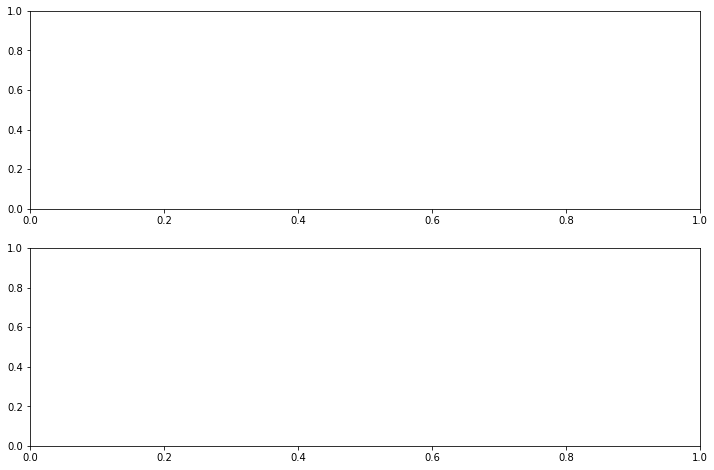

In [4]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

由于我们要求一个子图（2,1），我们得到一个有两行一列的图。

让我们稍微打破一下。 当pandas生成条形图时，这里的幕后实际操作是：

生成一个新的matplotlib图对象。
创建一个新的matplotlib AxesSubplot对象，并将其分配给图。
使用AxesSubplot方法在屏幕上绘制信息。
将结果返回给用户。
以类似的方式，我们上面的子图操作创建了一个整体图，其中两个AxesSubplots垂直嵌套在其中。

子图返回两个东西，一个图（我们分配给图）和一个包含在其中的轴的数组（我们分配给axarr）。 以下是axarr内容：

In [5]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52fb7b2940>,
      dtype=object)

为了告诉pandas哪个子图我们想要一个新的情节进入第一个或第二个 - 我们需要从列表中获取正确的轴并通过ax参数将其传递给pandas：

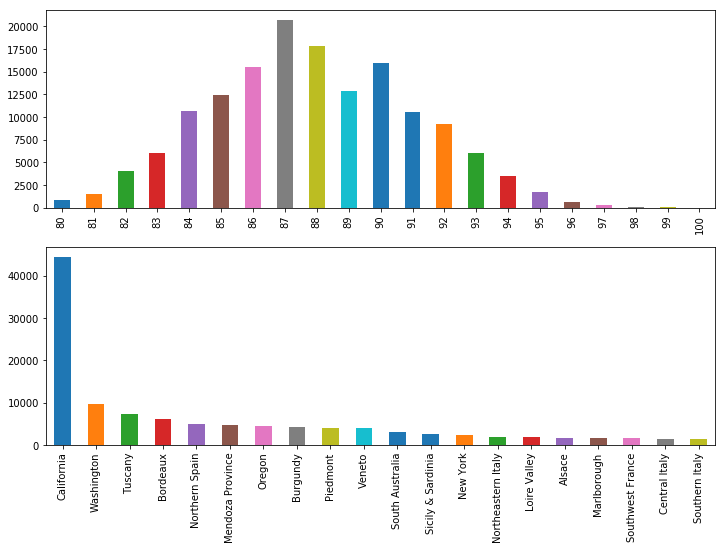

In [6]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

我们当然不仅限于只有一行。 我们可以根据需要创建任意数量的子图，无论我们需要什么配置。

例如：

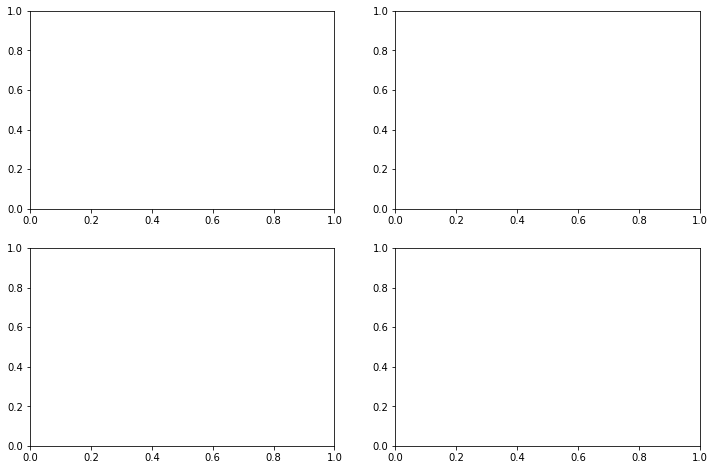

In [7]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

如果有多列和多行，如上所述，轴数组将成为列表列表：

In [9]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52fb26f828>,
      dtype=object)

这意味着要绘制我们之前的数据，我们现在需要一个行号，然后是一个列号。

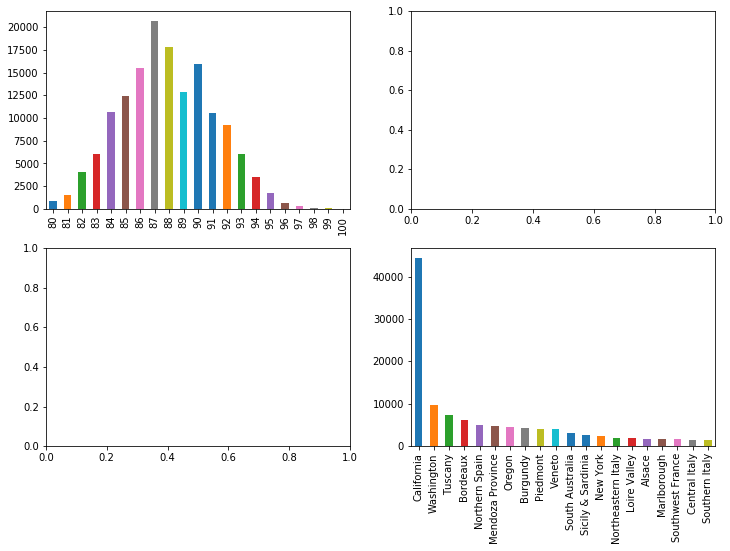

In [10]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)

请注意，按点数计算的葡萄酒条形图位于第一行和第一列（[0] [0]位置），而原产地葡萄酒的条形图位于第二行和第二列（[1] [1]）。

通过将子图与我们在上一节中学到的样式相结合，我们可以创建具有吸引力的面板显示。

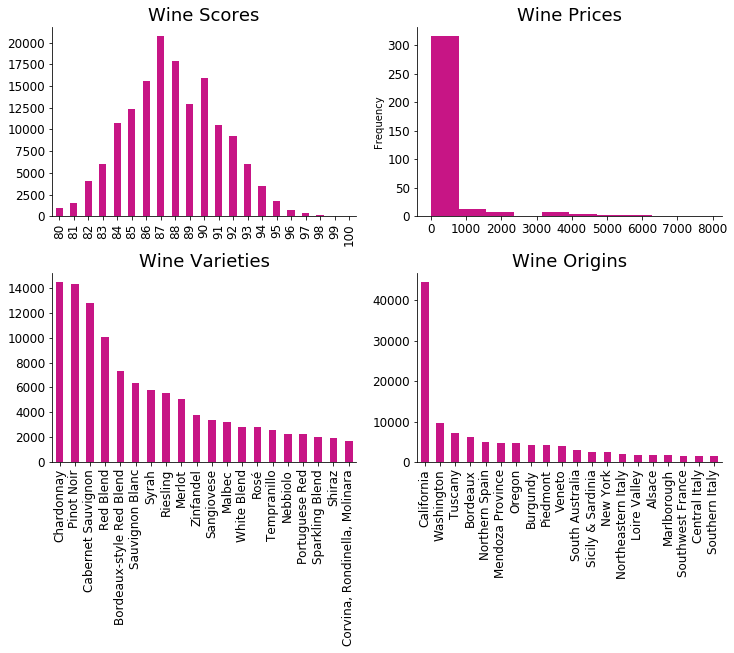

In [11]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine()

### Why subplot?

为什么子图有用？

通常，作为探索性数据可视化过程的一部分，您会发现自己创建了大量较小的图表来探测数据的一个或几个特定方面。例如，假设我们有兴趣比较相对普通的葡萄酒和相对稀有的葡萄酒的分数。在这些情况下，将我们将生成的两个图组合成一个视觉“单元”进行分析和讨论是合乎逻辑的。

当我们将子图与我们在之前笔记本中探索过的样式属性结合起来时，这种技术使我们能够创建极具吸引力且信息丰富的面板显示。

最后，子图非常有用，因为它们可以实现切面。分面是跨多个子图破坏数据变量的行为，并将这些子图组合成一个图。因此，不是一个条形图，我们可能有四个，在网格中排列在一起。

执行刻面的推荐方法是使用seaborn FacetGrid工具。此功能在本教程的单独部分中进行了探讨。

### Exercises

让我们通过回答一些关于我们在本节中使用的图表的问题来测试自己。 得到答案后，单击下面的“输出”按钮以显示正确答案。

1.matplotlib图由一个由一个或多个Y组成的X组成。什么是X和Y？  
2.子图函数将哪两个参数作为输入？  
3.子图函数返回两个变量？

1.该图由一个由一个或多个轴组成的整体图组成。  
2.子图函数将行数作为第一个参数，列数作为第二个参数。  
3.子图函数返回一个图形和一个轴数组。

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pokemon = pd.read_csv("./input/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


(<matplotlib.figure.Figure at 0x7f52faada828>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52f0e43b00>,
       dtype=object))

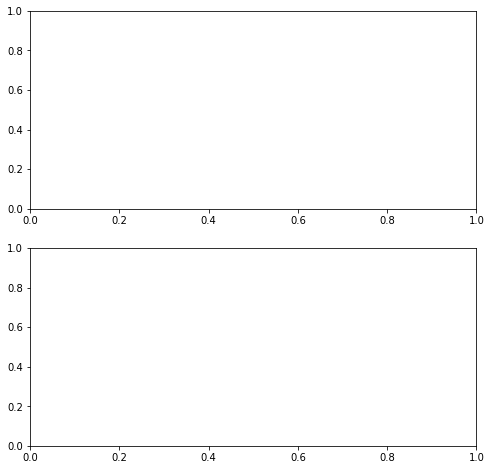

In [14]:
plt.subplots(2, 1, figsize=(8, 8))

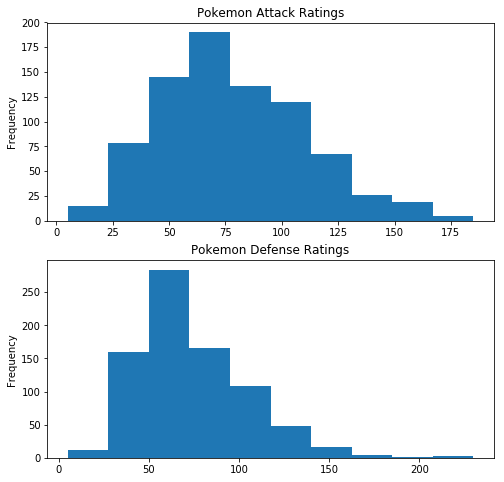

In [16]:
fig, axarr = plt.subplots(2, 1, figsize=(8, 8))
pokemon['attack'].plot.hist(ax=axarr[0], title='Pokemon Attack Ratings')
pokemon['defense'].plot.hist(ax=axarr[1], title='Pokemon Defense Ratings')

### Conclusion

在上一节中，我们探讨了一些pandas / matplotlib样式参数。 在本节中，我们通过探索子图来进一步深入研究。

这两个部分一起总结了我们的风格入门。 希望我们的情节现在更清晰，更有信息。